# Question 1
(Bayes Theorem) Read the following example and complete the exercises
Trolls Under the Bridge

1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:

1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

# 1.1
What is the chance of the knight crossing the bridge safely?

Answer: As the Genomes(G) are benign so the probabilty of crossing the bridge safely would be P(E3)=0.6

# 1.2
Before crossing a bridge, a knight captures a troll. 
“I now have an 80% chance of crossing safely,” he reasons, 
“since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”
Do you agree with him? Why?

Answer: No, I do not agree with this because the chance of the crossing bridge safely will then reduced, as it could be any of the pattern TGGG,GTGG,GGTG or GGGT but always there will be threat for any of the sequence.

# 1.3
Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured

 P(A|B)=(P(B|A)P(A))/P(B)
 
Given the three events, E1, E2, and E3, which two of the three events does the knight need to consider after a troll was captured?

Answer: Given the three events, E1, E2, and E3, the knight need to consider E1 and E2 event. As E3 is free from troll(t), therefore, there could be any of these two event where there is troll(T) is should be in consider for calculating the chances.

# 1.4
Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured.
Probability of one event given a troll captured:

In [1]:
# Given, 
# P(T|E1)=2/5;

# P(T|E2)=1/5;

# P(T|E3)=0;

# P(E1)=0.2

# P(E2)=0.2

# P(E3)=0.6

# so,
# P(T)=P(T|E1)*P(E1)+P(T|E2)*P(E2)+P(T|E3)*P(E3)=(2/5*0.2)+(1/5*0.2)+(0*0.6)=3/25;

# P(E1|T)=(P(T|E1)*P(E1))/(P(T))=(2/5*0.2)/(3/25)=2/3;

Probability of the other event given a troll captured:

P(E2/T)=(P(T|E2)P(E2))/(P(T))=(1/5*0.2)/(3/25)=1/3

# 1.5
What is the chance of the knight crossing safely?

Answer: The probabilty of night crossing safely after capturing one troll would be as same as the probabilty of P(E2/T)=0.333 
Because only that events meets up the requirment rather than P(E1/T).

Now looking back to 1.1, the probabilities were changed after assimilating data!

Answer: Yes, the probabilities were changed from 0.6 to 0.333 after assimilating data. 

# Question 2
(Polynomial Fitting) Read the following example and complete the exercises
Biological data always comes with errors that influence the intepretation of the data significantly.
In this question, we will simulate data and see how noises affect the parameter estimation.

In [2]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

    Updating registry at `C:\Users\Rasel\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Rasel\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\Rasel\.julia\environments\v1.8\Manifest.toml`


In [3]:
import Distributions as di
import Plots
import Polynomials as Polynomials
using Polynomials: Polynomial, fit, coeffs
using Plots
using Random
using Statistics

2.1

Generate the independent variable x ranging from -10 to 10 with an increment of 1

Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2

In [4]:
x=-10:1:10
collect(x);
y_true=x.^2.0 .+ 3.0.*x .- 2.0

21-element Vector{Float64}:
  68.0
  52.0
  38.0
  26.0
  16.0
   8.0
   2.0
  -2.0
  -4.0
  -4.0
  -2.0
   2.0
   8.0
  16.0
  26.0
  38.0
  52.0
  68.0
  86.0
 106.0
 128.0

# 2.2
1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed

In [5]:
# 1. Generate the Guassian noises with zero mean and a standard deviation of 10
G_d=di.Gaussian(0,10.0)

# 2. Add the noises to y_true to obtain y_observed
y_observed=y_true .+ rand(G_d,length(x));

# 2.3
Fit the data (x, y_observed) with a second order polynomial.

1. Make a scatter plot of y_observed along x

2. Plot a line of y_true along x on the scatter plot

3. Plot a line of the fitted polynomial along x on the same plot

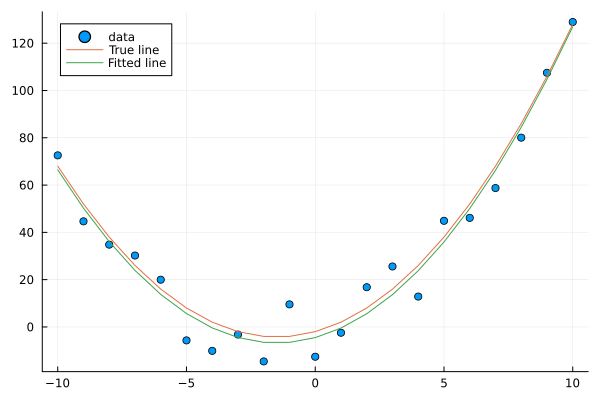

In [6]:
x=-10:1:10
collect(x);
y_true=x.^2.0 .+ 3.0.*x .- 2.0
G_d=di.Gaussian(0,10.0)
y_observed=y_true .+ rand(G_d,length(x));
# 1. Make a scatter plot of y_observed along x
scatter(x,y_observed, label="data")

# 2. Plot a line of y_true along x on the scatter plot
plot!(x,y_true, label="True line")

# 3. Plot a line of the fitted polynomial along x on the same plot
poly_fit= fit(x,y_observed,2)
y_fitted=poly_fit.(x) #fit_coeff[1] .+ fit_coeff[2] .*x .+ fit_coeff[3] .*x.^2.0
plot!(x,y_fitted, label="Fitted line")

# 2.4
Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

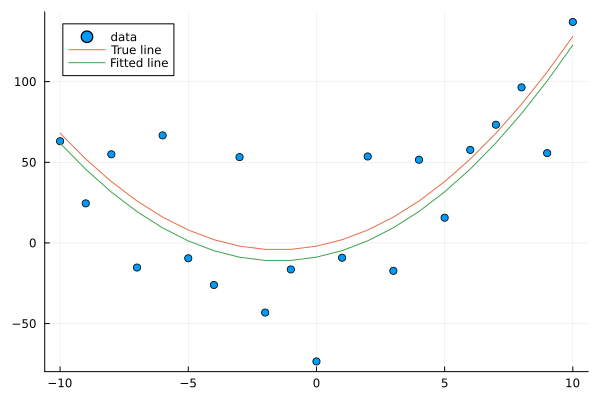

In [7]:
x=-10:1:10
collect(x);
y_true=x.^2.0 .+ 3.0.*x .- 2.0
G_d=di.Gaussian(0,50.0)
y_observed=y_true .+ rand(G_d,length(x));
poly_fit= fit(x,y_observed,2)
y_fitted= poly_fit.(x) 
scatter(x,y_observed, label="data")
plot!(x,y_true, label="True line")
plot!(x,y_fitted, label="Fitted line")

Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

There is a variation in the fitting to true value. The fit is not closer to the true value, 
because there is large standard deviation than the previous one. 
The error between true and fitting value increases with the increase of standard deviation to data points.    

# 2.5
Repeat 2.2 and 2.3 with a tenth order polynomial fit

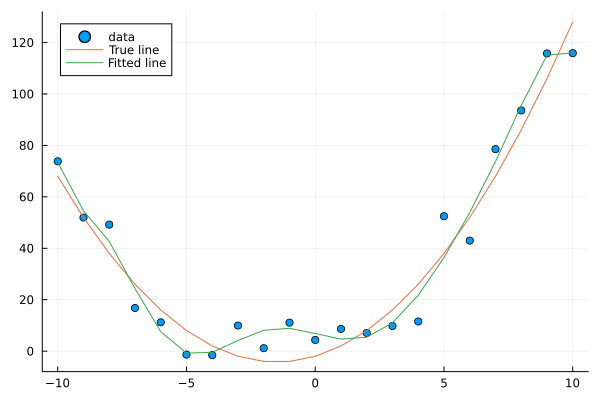

In [8]:
# 2.2
x=-10:1:10
collect(x);
y_true=x.^2.0 .+ 3.0.*x .- 2.0
G_d=di.Gaussian(0,10.0)
y_observed=y_true .+ rand(G_d,length(x));
poly_fit= fit(x,y_observed,10)
scatter(x,y_observed, label="data")
plot!(x,y_true, label="True line")
y_fitted=poly_fit.(x)
plot!(x,y_fitted, label="Fitted line")

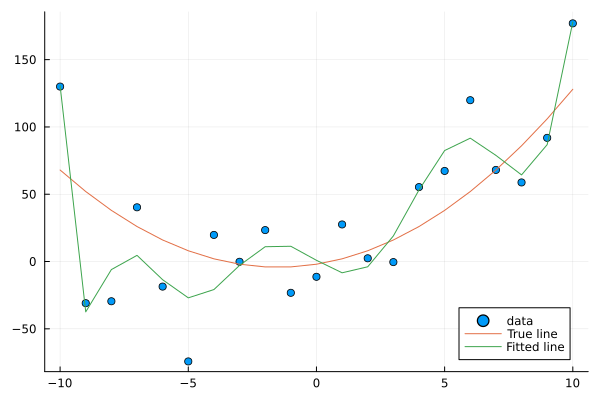

In [9]:
# 2.3
x=-10:1:10
collect(x);
y_true=x.^2.0 .+ 3.0.*x .- 2.0
G_d=di.Gaussian(0,50.0)
y_observed=y_true .+ rand(G_d,length(x));
poly_fit= fit(x,y_observed,10)
y_fitted= poly_fit.(x) 
scatter(x,y_observed, label="data")
plot!(x,y_true, label="True line")
plot!(x,y_fitted, label="Fitted line")

# 2.6
1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1

2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x

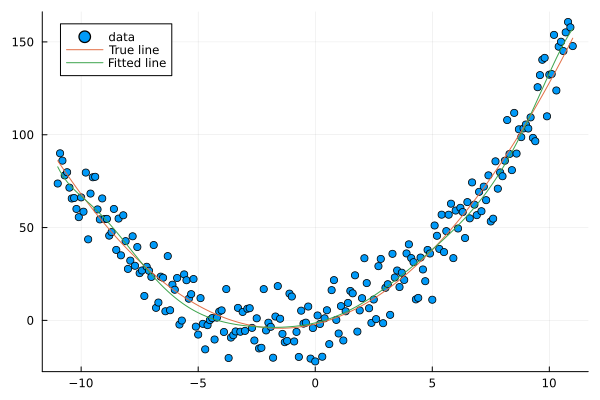

In [10]:
 x_fit=-11:0.1:11
 collect(x_fit)
 y_true=x_fit.^2.0 .+ 3.0 .* x_fit .- 2.0
 G_d=di.Gaussian(0,10.0)
 y_observed=y_true .+ rand(G_d,length(x_fit));
 poly_fit= fit(x_fit,y_observed,10)
 y_fitted= poly_fit.(x_fit) 
 scatter(x_fit,y_observed, label="data")
 plot!(x_fit,y_true, label="True line")
 plot!(x_fit,y_fitted, label="Fitted line")

3.What do you observe in the plot? What is this phenomenon called?

In [11]:
function chisqr(datax,datay,fitfct)
    return sum((datay .- fitfct.(datax)).^2)
    
end
chisqr(x_fit,y_observed,poly_fit)

# There is a bigger chisqr value which define that,
# there will be under fitting of the curve, as it does not pass most of the data points. 
# But with the higher order polynomial the fitting values and true  values are matching better. 

24110.735249639278